1.Importamos librerias

In [361]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import numeritos as nitos
pd.set_option('display.max_colwidth',1000)
from scipy.special import softmax
import pandas as pd
import xml.etree.ElementTree as ET
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from collections import Counter
import matplotlib.pyplot as plt
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
from transformers import BertTokenizer, TFBertForSequenceClassification
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import tensorflow as tf
from datetime import datetime
import sqlite3
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
import os
import pickle
from nltk.corpus import stopwords 


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/luismi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [279]:
#Hacemos una consulta 
query='thebridge_tech (@thebridge_tech) until:2022-10-05 since:2022-06-13'
tweets= []
limit=100000


In [280]:
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets)== limit:
        break
    else:
        tweets.append([tweet.date,tweet.user.id,tweet.user.displayname,tweet.user.username, tweet.content,tweet.conversationId,tweet.retweetCount,tweet.replyCount, tweet.likeCount,tweet.mentionedUsers.count,tweet.user.followersCount, tweet.quoteCount])
    

In [281]:
df=pd.DataFrame(tweets, columns=['Date','User_id','User','Username','Content','Content_id','Retweet_count','Reply','Likes','Mentions','Followers','Quote' ])


In [304]:
df.head()

,Date,User_id,User,Username,Content,Content_id,Retweet_count,Reply,Likes,Mentions,Followers,Quote,Result
0,2022-10-04 16:27:23+00:00,1003872445,Pau Mugarra,PauMugarra,"recordar que la seman que vien ten la primer qued #cps en madrid, en @thebridge_tech, en el que tendr la gran suert de cont con @recuenc par que nos de una charla. las plaz se han agotado, per os pod apunt al grup par proxim qued 🚀",1577334577701453827,2,0,12,<built-in method count of list object at 0x164802dc0>,827,0,1
1,2022-10-03 11:52:25+00:00,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3,el desarroll web es uno de los perfil mas demand en el merc laboral 📈 descubr nuestr #bootcamp desarroll web full stack de la man de @thebridge_tech 💻 tod la inform aqui! 👇 https://t.co/lootu97aqq https://t.co/xpaazxxsdx,1576902991507922944,3,0,3,<built-in method count of list object at 0x163bf3440>,121,0,1
2,2022-10-03 08:48:29+00:00,706520411551494145,JoseSola,Jose_Sola_,@jorgegrev @thebridge_tech enhorabuen crack!,1576846293179457536,0,0,1,<built-in method count of list object at 0x16507fe00>,554,0,0
3,2022-09-28 20:14:18+00:00,604485175,Berta Otero,bertinha84,hoy por fin ve la luz mi prim cas study publico. un trabaj intens de fin de bootcamp realiz con un client real @emancipatic y dos seman par que las 5 vertical en @thebridge_tech hic realid un mvp. os invit a verl y dar feedback. https://t.co/rkcjxulys9 https://t.co/pqm0dvxj3x,1575217357105946624,3,0,4,<built-in method count of list object at 0x1651703c0>,59,0,1
4,2022-09-27 19:51:59+00:00,1391838162830385165,Apiux Tecnología,Apiuxtecnologia,"¿er o quier ser talent it y estas en españa? 🇪🇸 si la respuest es si, te cont que ten alianz con @idbootcamps y @thebridge_tech💻 estam felic abrir nuestr puert par que estudi de nuestr partners se conviert en futur yellowers 🥳",1574849353172373504,1,1,2,<built-in method count of list object at 0x165187100>,208,0,1


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           150 non-null    datetime64[ns, UTC]
 1   User_id        150 non-null    int64              
 2   User           150 non-null    object             
 3   Username       150 non-null    object             
 4   Content        150 non-null    object             
 5   Content_id     150 non-null    int64              
 6   Retweet_count  150 non-null    int64              
 7   Reply          150 non-null    int64              
 8   Likes          150 non-null    int64              
 9   Mentions       150 non-null    object             
 10  Followers      150 non-null    int64              
 11  Quote          150 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(7), object(4)
memory usage: 14.2+ KB


In [307]:
#2 Crear un SQL
author_df=df[['User','Username']]
tweet_df=df[['Content','Content_id','Retweet_count','Reply','Likes','Followers','Quote' ]]

connection = sqlite3.connect('data/twitter.db')
tweet_df.to_sql('tweets', con=connection, index=False)
author_df.to_sql('users', con=connection, index=False)
connection.close()


## Análisis Exploratorio

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Date           150 non-null    datetime64[ns, UTC]
 1   User_id        150 non-null    int64              
 2   User           150 non-null    object             
 3   Username       150 non-null    object             
 4   Content        150 non-null    object             
 5   Content_id     150 non-null    int64              
 6   Retweet_count  150 non-null    int64              
 7   Reply          150 non-null    int64              
 8   Likes          150 non-null    int64              
 9   Mentions       150 non-null    object             
 10  Followers      150 non-null    int64              
 11  Quote          150 non-null    int64              
 12  Result         150 non-null    int64              
dtypes: datetime64[ns, UTC](1), int64(8), object(4)
mem

Thebridge_tech fue mencionado 150 veces desde el 13 de Junio hasta el 5 de Octubre

In [314]:
#Para medir el alcance se tiene que sumar los retweets+ las respuestas+ los likes+ la quote
df['Total_interactions'] = df['Retweet_count'] + df['Reply'] + df['Likes'] + df['Quote']


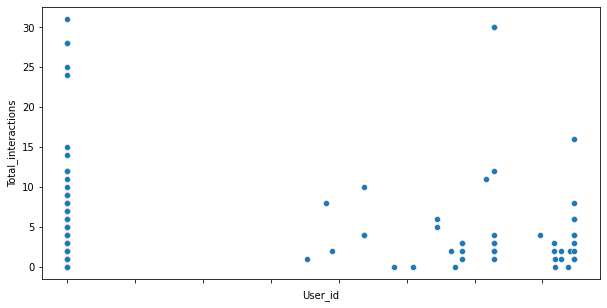

In [315]:
def scatterplot(x, y, df):
    plt.figure(figsize=(10,5))
    plot = sns.scatterplot(x=x,y=y,data=df);
    plot.set(xticklabels=[]) 
    plt.show()

scatterplot('User_id', 'Total_interactions', df);

3.a Tweet con mayor alcance

In [332]:
df['Total_interactions'].argmax()
df.iloc[[5]]

,Date,User_id,User,Username,Content,Content_id,Retweet_count,Reply,Likes,Mentions,Followers,Quote,Result,total_interactions,Total_interactions
5,2022-09-23 09:44:36+00:00,1003872445,Pau Mugarra,PauMugarra,y segu con lo prometido: primer qued de la comun #cps en madr 🚀: https://t.co/xnwjku6fpi en un espaci ced por @thebridge_tech.,1573246948693651456,7,0,20,<built-in method count of list object at 0x1650e5840>,827,4,0,31,31


El tweet con mayor alcance ha sido el de Pau quien tuvo 7 retweets y 20 likes

In [284]:
#3.b Usuario que más menciona la escuela
mentions=df['Username'].value_counts().head(10)


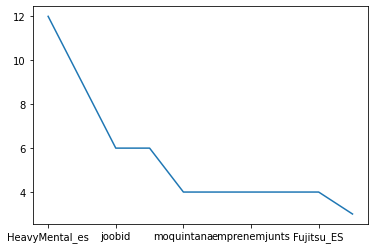

In [285]:
mentions.plot();

In [286]:
df[(df['Username'] == "HeavyMental_es")] 
#HeavyMental es usuario que más a mencionado the Bridge

,Date,User_id,User,Username,Content,Content_id,Retweet_count,Reply,Likes,Mentions,Followers,Quote
70,2022-06-29 19:12:24+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,@carlosmdh @UbaldoHervas @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Yes!! ;) ;),1541660216290336769,0,1,3,<built-in method count of list object at 0x165659780>,3330,0
73,2022-06-29 18:00:06+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,El sentido de la vida ya no es 42 -- Light Mental edición especial @TheBridge_Tech https://t.co/z7hOVln8Bp,1542206287915585536,3,2,22,<built-in method count of list object at 0x164847ec0>,3330,3
96,2022-06-28 07:50:34+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,@Mulder01198676 @PauMugarra @DavidAlayon @Recuenco @_miki @GuillermoDeHaro @TheBridge_Tech Sí a todo,1541660216290336769,0,1,1,<built-in method count of list object at 0x16564c340>,3330,0
103,2022-06-27 23:05:58+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,@Bombabarros @Mulder01198676 @_miki @Recuenco @DavidAlayon @GuillermoDeHaro @moquintana @TheBridge_Tech Gracias por venir y buen viaje de vuelta… eres top!!,1541439169863491585,0,0,3,<built-in method count of list object at 0x165719740>,3330,0
115,2022-06-27 15:35:47+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,@vmcasamayor @TheBridge_Tech @Recuenco @Alienta 🙄 @TheBridge_Tech,1536310176801857538,0,0,1,<built-in method count of list object at 0x165708780>,3330,0
118,2022-06-27 12:51:00+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,"@joobid @TheBridge_Tech @Recuenco @GuillermoDeHaro Si claro, Miki no tiene otra cosa que hacer",1541046264539893760,0,1,1,<built-in method count of list object at 0x165708ac0>,3330,0
122,2022-06-27 08:17:55+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,"@jatorrero @TheBridge_Tech Juan Antonio, te mandamos dm para que te vengas que hay hueco!",1541046264539893760,0,1,2,<built-in method count of list object at 0x1656808c0>,3330,0
124,2022-06-27 05:47:51+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,@navarro_batista @TheBridge_Tech En orbyt ya si eso.,1541046264539893760,0,1,1,<built-in method count of list object at 0x165725cc0>,3330,0
129,2022-06-26 14:14:30+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,"@CarlosLGonzalez @TheBridge_Tech Yes, seguramente martes a la misma hora en todos lados :)",1541046264539893760,0,0,2,<built-in method count of list object at 0x1656e7780>,3330,0
131,2022-06-26 14:09:04+00:00,1255794072280842240,Heavy Mental,HeavyMental_es,"@CarlosLGonzalez @TheBridge_Tech Sí, vida real se llama.",1541046264539893760,0,1,1,<built-in method count of list object at 0x16573d100>,3330,0


In [344]:
#3.c Junio es el mes que concetra mayor número de tweets
reach=pd.PeriodIndex(df['Date'], freq='M').value_counts()
reach

2022-06    87
2022-07    27
2022-09    23
2022-08    10
2022-10     3
Freq: M, Name: Date, dtype: int64

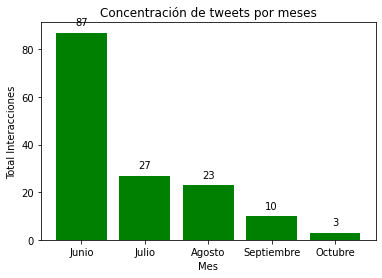

In [357]:
Meses=['Junio','Julio','Agosto','Septiembre','Octubre']
Total=[87,27,23,10,3]
barplot = plt.bar(Meses, Total, color = 'green')

for bar in barplot:
    # print(bar.get_height())
    # print(bar.get_x())
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()+3, bar.get_height(), ha = "center")


plt.xlabel("Mes")
plt.ylabel("Total Interacciones")
plt.title("Concentración de tweets por meses");

In [358]:
#Encontrando la palabra más frecuente
Counter(" ".join(df['Content']).split()).most_common(100)


[('de', 167),
 ('@thebridge_tech', 132),
 ('en', 90),
 ('la', 85),
 ('el', 69),
 ('y', 67),
 ('@heavymental_', 64),
 ('que', 59),
 ('a', 57),
 ('@guillermodehar', 50),
 ('@recuenc', 49),
 ('par', 36),
 ('@_miki', 32),
 ('por', 31),
 ('@davidalayon', 31),
 ('un', 29),
 ('con', 26),
 ('las', 23),
 ('no', 23),
 ('del', 21),
 ('los', 19),
 ('si', 18),
 ('una', 17),
 ('se', 17),
 ('lo', 16),
 ('es', 14),
 ('mas', 14),
 ('nuestr', 14),
 ('graci', 14),
 ('firm', 14),
 ('nos', 13),
 ('@mulder01198676', 12),
 ('primer', 11),
 ('per', 11),
 ('tod', 11),
 ('ya', 11),
 ('ten', 10),
 ('al', 10),
 ('hoy', 10),
 ('talent', 10),
 ('te', 10),
 ('@alient', 10),
 ('conveni', 9),
 ('formacion', 9),
 ('@uriond', 9),
 ('hac', 9),
 ('@thebridge_tech,', 8),
 ('os', 8),
 ('esta', 8),
 ('dat', 8),
 ('aceler', 8),
 ('nuev', 8),
 ('@jotdownspain', 8),
 ('desarroll', 7),
 ('colabor', 7),
 ('desd', 7),
 ('entre', 7),
 ('ha', 7),
 ('sobr', 7),
 ('form', 7),
 ('sus', 7),
 ('the', 7),
 ('me', 7),
 ('@moquintan', 7),
 

In [373]:
def remove_links(text):
    return " ".join([' ' if ('http') in word else word for word in text.split()])

df['text'] = df['Content'].apply(lambda x: remove_links(x))

def remove_stopwords(text, language):
    stop = stopwords.words(language)
    return ' '.join([word for word in text.split() if word not in (stop)])

df['text'] = df['text'].apply(lambda x: remove_stopwords(x, 'spanish'))

def remove_mentions(text):
    return re.sub(r"\@\w+[,]|\@\w+|[,]\@\w+", " ", text)

df['text'] = df['text'].apply(lambda x: remove_mentions(x))

def signs_tweets(text, signs):
    return signs.sub(' ', text.lower())

signs = re.compile("(\.)|(\;)|(\:)|(\!)|(\?)|(\¿)|(\@)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\¡)")

df['text'] = df['text'].apply(lambda x: signs_tweets(x, signs))
def remove_hash(text):
    return re.sub(r"\#\w+[,]|\#\w+|[,]\#\w+", " ", text)

df['text'] = df['text'].apply(lambda x: remove_hash(x))
def remove_aux_words(text, articles):
  return articles.sub(' ', text.lower())

articles = re.compile('\s+(la|el|y|the|and|que|si|no|par|.|#)(\s+)')

df['text'] = df['text'].apply(lambda x: remove_aux_words(x, articles))
df['text'] = df['text'].apply(lambda x: nitos.clean_emoji(x))
df.head()

,Date,User_id,User,Username,Content,Content_id,Retweet_count,Reply,Likes,Mentions,Followers,Quote,Result,total_interactions,Total_interactions,text
0,2022-10-04 16:27:23+00:00,1003872445,Pau Mugarra,PauMugarra,"recordar que la seman que vien ten la primer qued #cps en madrid, en @thebridge_tech, en el que tendr la gran suert de cont con @recuenc par que nos de una charla. las plaz se han agotado, per os pod apunt al grup par proxim qued 🚀",1577334577701453827,2,0,12,<built-in method count of list object at 0x164802dc0>,827,0,1,14,14,recordar seman vien ten primer qued madrid tendr gran suert cont charla plaz agotado per pod apunt grup proxim qued
1,2022-10-03 11:52:25+00:00,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3,el desarroll web es uno de los perfil mas demand en el merc laboral 📈 descubr nuestr #bootcamp desarroll web full stack de la man de @thebridge_tech 💻 tod la inform aqui! 👇 https://t.co/lootu97aqq https://t.co/xpaazxxsdx,1576902991507922944,3,0,3,<built-in method count of list object at 0x163bf3440>,121,0,1,6,6,desarroll web perfil mas demand merc laboral descubr nuestr desarroll web full stack man tod inform aqui
2,2022-10-03 08:48:29+00:00,706520411551494145,JoseSola,Jose_Sola_,@jorgegrev @thebridge_tech enhorabuen crack!,1576846293179457536,0,0,1,<built-in method count of list object at 0x16507fe00>,554,0,0,1,1,enhorabuen crack
3,2022-09-28 20:14:18+00:00,604485175,Berta Otero,bertinha84,hoy por fin ve la luz mi prim cas study publico. un trabaj intens de fin de bootcamp realiz con un client real @emancipatic y dos seman par que las 5 vertical en @thebridge_tech hic realid un mvp. os invit a verl y dar feedback. https://t.co/rkcjxulys9 https://t.co/pqm0dvxj3x,1575217357105946624,3,0,4,<built-in method count of list object at 0x1651703c0>,59,0,1,7,7,hoy fin ve luz prim cas study publico trabaj intens fin bootcamp realiz client real dos seman vertical hic realid mvp invit verl dar feedback
4,2022-09-27 19:51:59+00:00,1391838162830385165,Apiux Tecnología,Apiuxtecnologia,"¿er o quier ser talent it y estas en españa? 🇪🇸 si la respuest es si, te cont que ten alianz con @idbootcamps y @thebridge_tech💻 estam felic abrir nuestr puert par que estudi de nuestr partners se conviert en futur yellowers 🥳",1574849353172373504,1,1,2,<built-in method count of list object at 0x165187100>,208,0,1,4,4,er quier ser talent it españa respuest cont ten alianz estam felic abrir nuestr puert estudi nuestr partners conviert futur yellowers 🥳


In [374]:
most_repeated = Counter(" ".join(df['text']).split()).most_common(100)

most_repeated = most_repeated[:10]

df_text = pd.DataFrame(most_repeated, columns =['Word', 'Times'])

df_text

,Word,Times
0,mas,16
1,nuestr,14
2,graci,14
3,firm,14
4,primer,12
5,per,12
6,tod,11
7,ten,10
8,hoy,10
9,talent,10


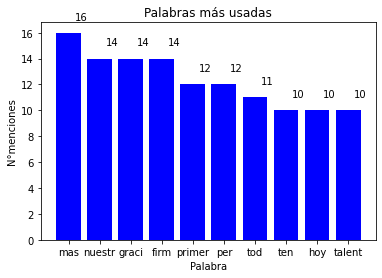

In [383]:
barplot = plt.bar(df_text['Word'], df_text['Times'], color = 'blue')

for bar in barplot:
    
    plt.text(bar.get_x() + bar.get_width()/1, bar.get_height()+1, bar.get_height(), ha = "center")


plt.xlabel("Palabra")
plt.ylabel("N°menciones")
plt.title("Palabras más usadas");

## Para encontrar el mayor alcance debemos identificar las metricas publicas

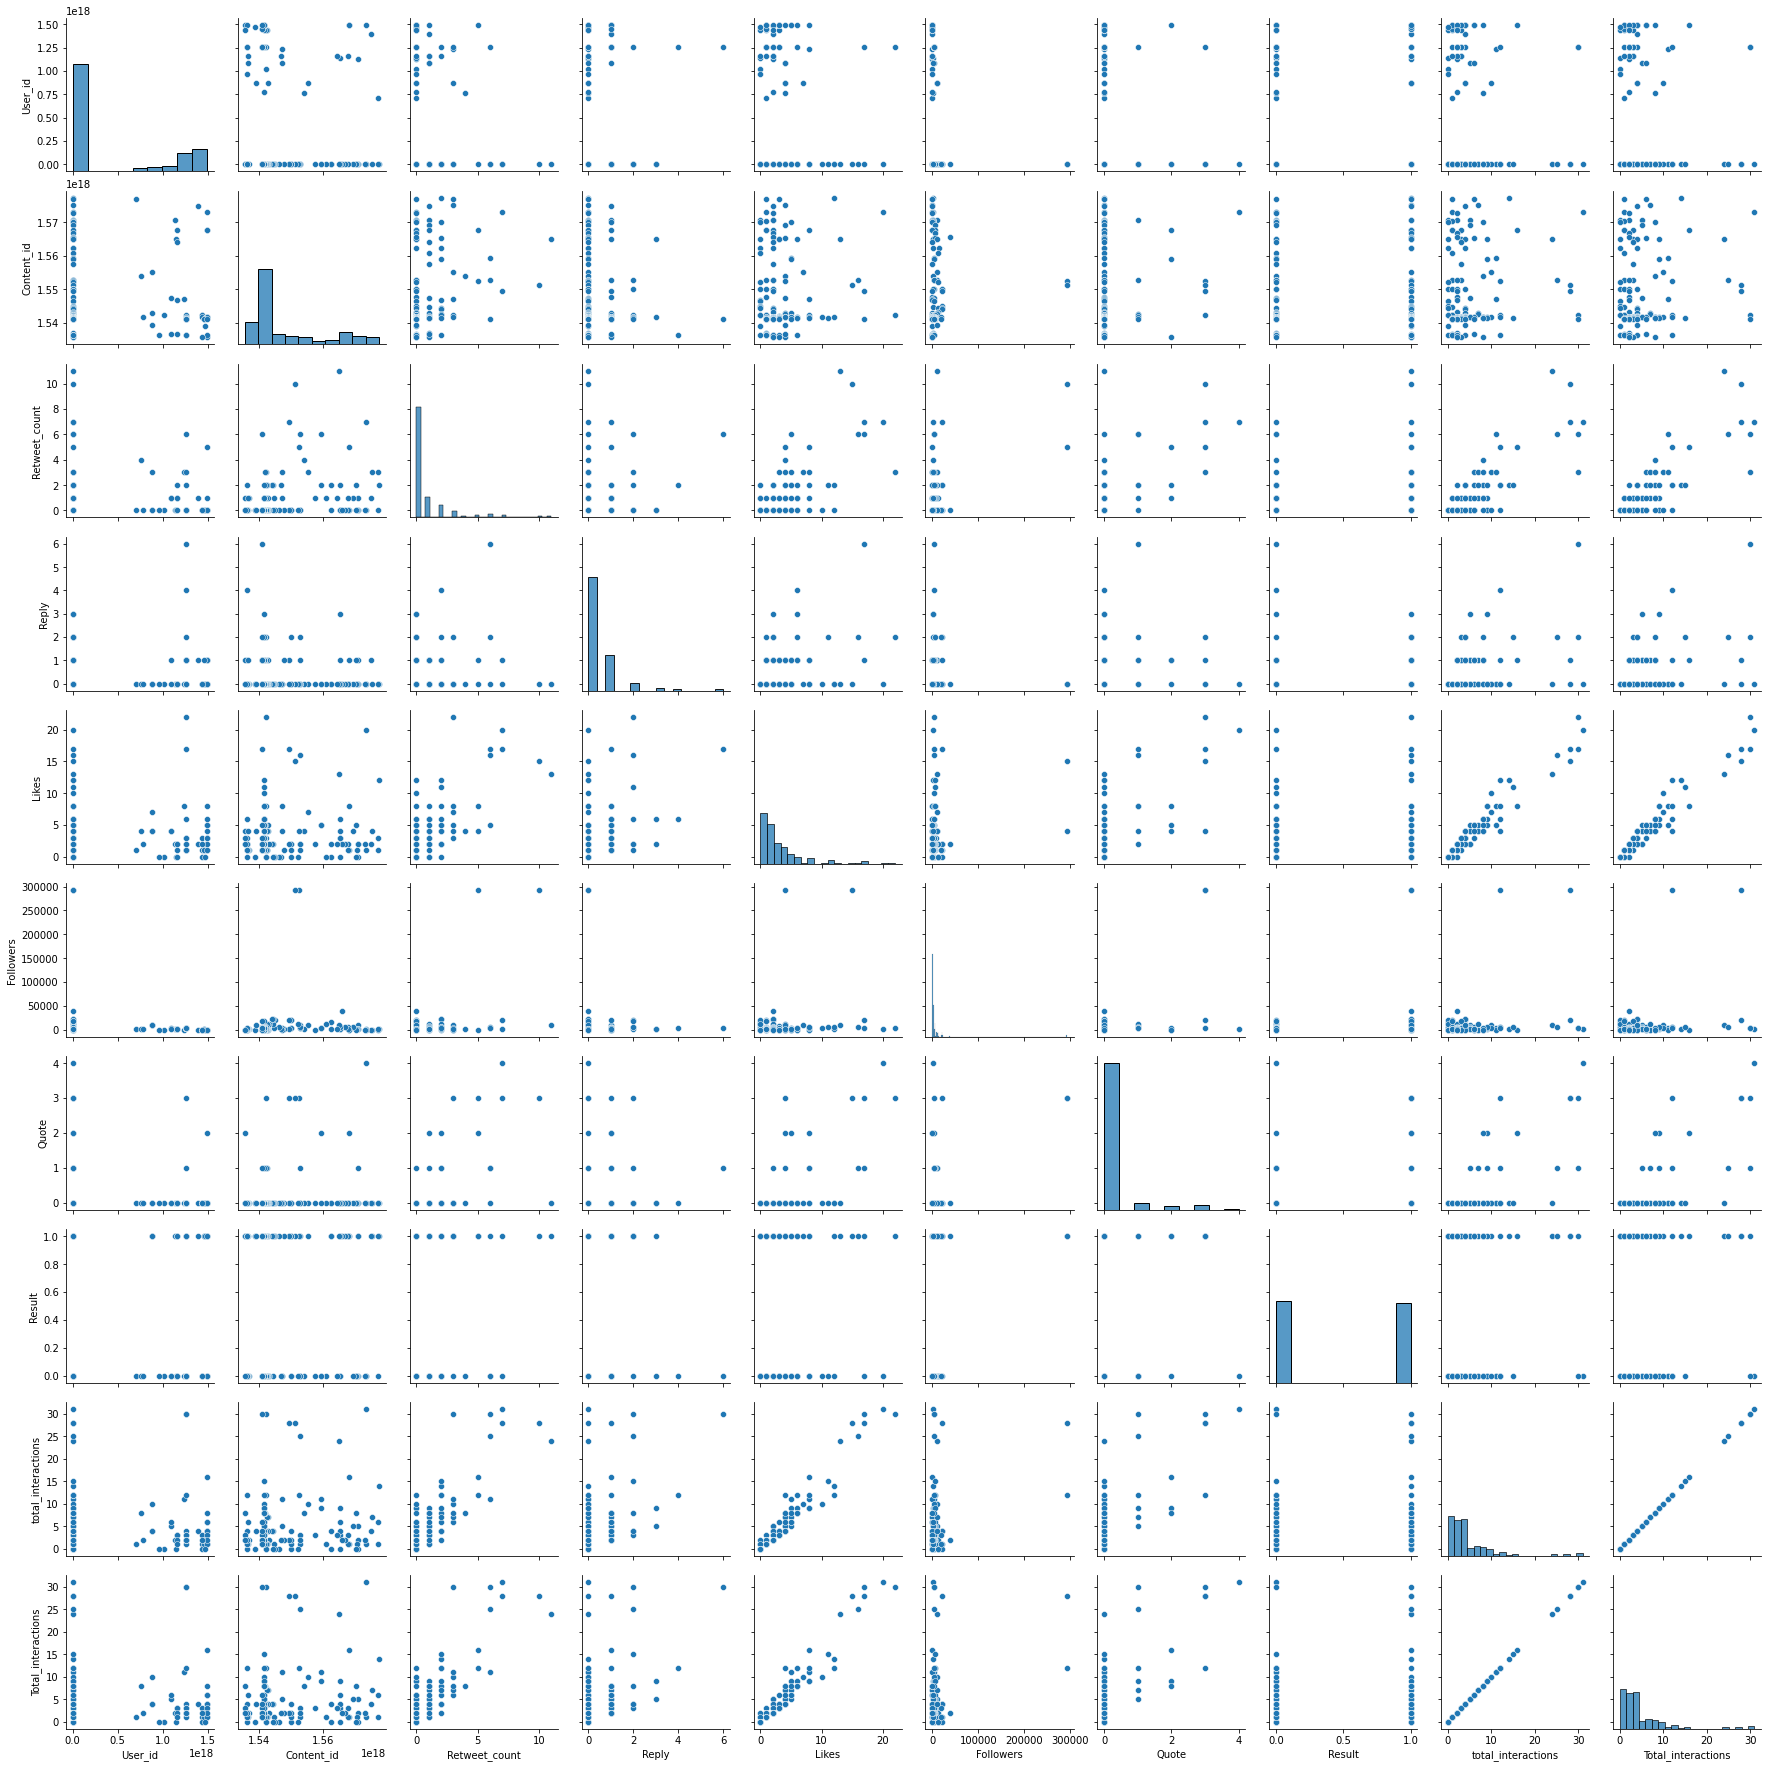

In [386]:
sns.pairplot(df);


In [289]:

public_metrics=df[['Retweet_count','Reply','Likes','Quote']]

In [290]:
public_metrics.corr()

,Retweet_count,Reply,Likes,Quote
Retweet_count,1.000000,0.157761,0.702875,0.619991
Reply,0.157761,1.000000,0.374411,0.136593
Likes,0.702875,0.374411,1.000000,0.646249
Quote,0.619991,0.136593,0.646249,1.000000


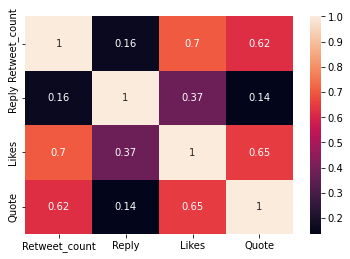

In [291]:
sns.heatmap(public_metrics.corr(), annot=True);

3.e Existe una amplia correlacion entre los likes con los retweet, los que nos denota que mientras más guste la publicación tendra más tendencia a ser compartida. 

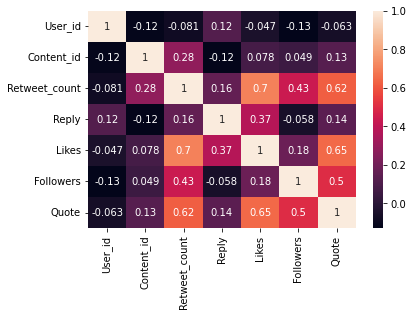

In [292]:
sns.heatmap(df.corr(), annot=True);

3.f Es importante reconocer quien de nuestros seguidores tiene mayor influencia(followers), ya que si enfocamos las publicaciones a ellos, nuestro alcance será mucho mayor. 

In [293]:
# #Análisis de sentimientos utilizando roBERTa

# mensaje=df['Content'][0]

In [294]:
# tweet_words=[]
# for word in mensaje.split(' '):
#     if word.startswith('@')and len(word)>1:
#         word= '@user'
#     elif word.startswith('http'):
#         word='http'
#     tweet_words.append(word)

In [295]:
# print(tweet_words)

In [296]:
# tweet_proc=' '.join(tweet_words)
# print(tweet_proc)

In [297]:
# print(tf.__version__)

In [298]:
#Recuperamos el modelo precargado
os.getcwd()


'/Users/luismi/Documents/Proyectos/Twitter_scrap/Proyecto_twitter'

In [299]:
model=pickle.load( open('model/sentiment_model', "rb" ))
model


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:329: UserWarning:

Trying to unpickle estimator Pipeline from version 1.0.2 when using versio

Pipeline(steps=[('vect',
                 CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                                 ngram_range=(1, 2))),
                ('cls', LogisticRegression(C=0.5))])

In [300]:
from nltk.stem.snowball import SnowballStemmer

def spanish_stemmer(x):
    stemmer = SnowballStemmer('spanish')
    return " ".join([stemmer.stem(word) for word in x.split()])

df['Content'] = df['Content'].apply(spanish_stemmer)
df['Content'].head()

0                                                 recordar que la seman que vien ten la primer qued #cps en madrid, en @thebridge_tech, en el que tendr la gran suert de cont con @recuenc par que nos de una charla. las plaz se han agotado, per os pod apunt al grup par proxim qued 🚀
1                                                            el desarroll web es uno de los perfil mas demand en el merc laboral 📈 descubr nuestr #bootcamp desarroll web full stack de la man de @thebridge_tech 💻 tod la inform aqui! 👇 https://t.co/lootu97aqq https://t.co/xpaazxxsdx
2                                                                                                                                                                                                                                            @jorgegrev @thebridge_tech enhorabuen crack!
3    hoy por fin ve la luz mi prim cas study publico. un trabaj intens de fin de bootcamp realiz con un client real @emancipatic y dos seman par que las 5

In [301]:
predictions=model.predict(df['Content'])
predictions

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

In [302]:
df['Result'] = pd.Series(predictions)
df.head()

,Date,User_id,User,Username,Content,Content_id,Retweet_count,Reply,Likes,Mentions,Followers,Quote,Result
0,2022-10-04 16:27:23+00:00,1003872445,Pau Mugarra,PauMugarra,"recordar que la seman que vien ten la primer qued #cps en madrid, en @thebridge_tech, en el que tendr la gran suert de cont con @recuenc par que nos de una charla. las plaz se han agotado, per os pod apunt al grup par proxim qued 🚀",1577334577701453827,2,0,12,<built-in method count of list object at 0x164802dc0>,827,0,1
1,2022-10-03 11:52:25+00:00,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3,el desarroll web es uno de los perfil mas demand en el merc laboral 📈 descubr nuestr #bootcamp desarroll web full stack de la man de @thebridge_tech 💻 tod la inform aqui! 👇 https://t.co/lootu97aqq https://t.co/xpaazxxsdx,1576902991507922944,3,0,3,<built-in method count of list object at 0x163bf3440>,121,0,1
2,2022-10-03 08:48:29+00:00,706520411551494145,JoseSola,Jose_Sola_,@jorgegrev @thebridge_tech enhorabuen crack!,1576846293179457536,0,0,1,<built-in method count of list object at 0x16507fe00>,554,0,0
3,2022-09-28 20:14:18+00:00,604485175,Berta Otero,bertinha84,hoy por fin ve la luz mi prim cas study publico. un trabaj intens de fin de bootcamp realiz con un client real @emancipatic y dos seman par que las 5 vertical en @thebridge_tech hic realid un mvp. os invit a verl y dar feedback. https://t.co/rkcjxulys9 https://t.co/pqm0dvxj3x,1575217357105946624,3,0,4,<built-in method count of list object at 0x1651703c0>,59,0,1
4,2022-09-27 19:51:59+00:00,1391838162830385165,Apiux Tecnología,Apiuxtecnologia,"¿er o quier ser talent it y estas en españa? 🇪🇸 si la respuest es si, te cont que ten alianz con @idbootcamps y @thebridge_tech💻 estam felic abrir nuestr puert par que estudi de nuestr partners se conviert en futur yellowers 🥳",1574849353172373504,1,1,2,<built-in method count of list object at 0x165187100>,208,0,1


In [303]:
df['Result'].value_counts(normalize=True)


0    0.506667
1    0.493333
Name: Result, dtype: float64